[[ 4.65328692  6.4472075   0.76905053]
 [ 2.01875588  1.41516152  2.87902862]
 [ 7.16728386  6.78437367 -0.41125251]
 ...
 [-0.49524106 -0.49120568  0.02347524]
 [-0.54689853 -0.55906302  0.29360291]
 [-0.30583033 -0.56966573 -0.61198432]]
          total_claim_count  opioid_day_supply  opioid_prescriber_rate
clusters                                                              
0                 53.748800         204.068800               31.151008
1                330.708333        2317.916667               30.542917
2                 31.803191         368.622340               65.642128


Text(29.333131510416678, 0.5, 'opioid_day_supply')

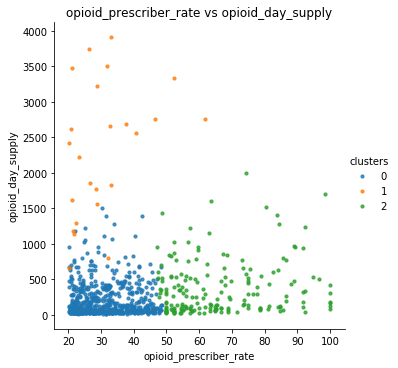

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import os
from scipy import stats
conn = sqlite3.connect('C:\\Users\\pklen\\Documents\\Sqlite\\DVADBS.db')
df3 = pd.read_sql_query("select total_claim_count,opioid_day_supply,opioid_prescriber_rate  from npi_summary_sample where opioid_bene_count=''", conn)
df3.replace("", 0, inplace=True)
df3 = df3.loc[df3['opioid_prescriber_rate'] > 20]
df3_wy = df3
clmns = ['total_claim_count','opioid_day_supply','opioid_prescriber_rate']
df3_wy_std = stats.zscore(df3_wy[clmns])
kmeans = KMeans(n_clusters=3, random_state=0).fit(df3_wy_std)
labels = kmeans.labels_
df3_wy['clusters'] = labels
print(df3_wy_std)
clmns.extend(['clusters'])
print(df3_wy[clmns].groupby(['clusters']).mean())


sns.lmplot('opioid_prescriber_rate', 'opioid_day_supply', 
           data=df3_wy, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 10})
plt.title('opioid_prescriber_rate vs opioid_day_supply')
plt.xlabel('opioid_prescriber_rate')
plt.ylabel('opioid_day_supply')